<div id="container" style="position:relative;">
<div style="position:center; float:left"><h1>03.1 - CryptoPunk Price Prediction<br>Using Keras Tuner - Appendix</h1></div>
<div style="position:relative; float:right"> 

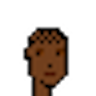
</div>

<hr> </hr>
Madelyn Goodman <br>
Brainstation Winter 2022 Capstone <br>
April 4, 2022

# Introduction

Keras has a hyperparameter tuning package that is not often used as runtimes generally quite extensive. I wanted to try this method for this project to see if I could get a model that fit better than those where I just tried arbitrary parameters based on my own theory. 

Due to these long run times I was not able to define a set of test parameters that resulted in a model that fit better than the models I tested on my own. Had I had more time to play around with this method, I would have tried to find a set of parameters that truly out performed my other models. 

This notebook was included as an appendix to demonstrate my understanding of this method.
<hr>

In [ ]:
# importing packages

#setting seeds
seed_value = 789

#setting the PYTHONHASHSEED environment variable to be fixed
import os
#making an environment variable to access from anywhere
os.environ['PYTHONHASHSEED']=str(seed_value)

#setting the python built-in random generator to be fixed
import random
random.seed(seed_value)

#setting numpy random generator to be fixed
import numpy as np
np.random.seed(seed_value)

#setting tensorflow random generator to be fixed 
import tensorflow as tf
tf.random.set_seed(seed_value)

#configuring a global tensorflow session 
from tensorflow import keras
from tensorflow.keras import layers
#makes sure you don't run code on a GPU - might be randomness that GPUs inject
CUDA_VISIBLE_DEVICES=""
!pip install keras-tuner --upgrade

#importing other packages
import pandas as pd



     |████████████████████████████████| 133 kB 5.0 MB/s 


# Cleaning the data

In [ ]:
#loading cleaned data
##CHANGE THIS PATH FOR SUBMISSION
cp_sales = pd.read_csv('Data/punk_sales_data.csv')

In [ ]:
#viewing data
pd.set_option('display.max_columns', None)
cp_sales.head()

,Unnamed: 0,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.98
1,1,Sold,2017-06-23,larvalabs,0.00,544,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.347835,1,0,0.00
2,2,Sold,2017-06-23,larvalabs,0.25,1841,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.566622,1,0,0.25
3,3,Sold,2017-06-23,larvalabs,0.00,3134,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.324392,1,0,0.00
4,4,Sold,2017-06-23,larvalabs,0.06,4025,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.321051,1,0,0.06


In [ ]:
#dropping unamed column
cp_sales.drop('Unnamed: 0', inplace=True, axis=1)
cp_sales.head()

,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.98
1,Sold,2017-06-23,larvalabs,0.00,544,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.347835,1,0,0.00
2,Sold,2017-06-23,larvalabs,0.25,1841,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.566622,1,0,0.25
3,Sold,2017-06-23,larvalabs,0.00,3134,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.324392,1,0,0.00
4,Sold,2017-06-23,larvalabs,0.06,4025,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.321051,1,0,0.06


In [ ]:
#sorting by date and punk
cp_sales.sort_values(['punk_id', 'date'], ascending=(True, True), inplace=True, ignore_index=True)
cp_sales.head()

,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.00,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.98
1,Sold,2017-07-07,larvalabs,1.60,0,241.28,9,3.71,1,0.98,14,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.62
2,Sold,2018-11-30,larvalabs,25.00,0,111.65,1,1.60,2,1.60,525,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,23.40
3,Sold,2017-06-26,larvalabs,0.42,1,252.99,4,0.23,0,0.00,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443,1,0,0.42
4,Sold,2019-04-06,larvalabs,31.00,1,165.79,4,1.38,1,0.42,652,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443,1,0,30.58


# Starting to build my tuner

In [ ]:
#defining variables to drop that won't work in the model
todrop_model = ['txn_type', 'date', 'source', 'punk_id', 'larvalabs', 'opensea', 'price_delta']

In [ ]:
#dropping variables
cp_sales_model = cp_sales.drop(todrop_model, axis=1)
cp_sales_model.head()

,eth,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,0.98,326.99,0,0.00,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207
1,1.60,241.28,9,3.71,1,0.98,14,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207
2,25.00,111.65,1,1.60,2,1.60,525,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207
3,0.42,252.99,4,0.23,0,0.00,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443
4,31.00,165.79,4,1.38,1,0.42,652,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443


In [ ]:
#prepping data
#splitting feature and target
X = cp_sales_model.drop('eth', axis=1)
y = cp_sales_model['eth']
print(X.shape)
print(y.shape)

#testing and validtion split  
from sklearn.model_selection import train_test_split

#test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=789)
#validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=789)

#scaling 
from sklearn.preprocessing import StandardScaler
cp_scaler = StandardScaler()
cp_scaler.fit(X_train)

X_train_s = cp_scaler.transform(X_train)
X_validation_s = cp_scaler.transform(X_validation)
X_test_s = cp_scaler.transform(X_test)

(18943, 101)
(18943,)


In [ ]:
#defining the parameters for the kuner to search through
def build_model(hp):

    '''
    This function defines parameteres for the keras tuner to search through to find the best fitting model

    Parameters
    ---------------------------------------
    hp: The keras tuner hyperparameter method

    Return
    ----------------------------------------
    This function returns a set of parameters for the keras tuner to search through using the 
    kt.HyperParameters() method.
    
    '''

    #building a sequential model 
    model = keras.Sequential()
    
    #tuning the number of layers
    #have tried up to 8 - 8 worked relatively well 
    for i in range(hp.Int('num_layers', 1, 8)):
        model.add(
            layers.Dense(
                #tuning number of nodes per layer
                #max is 101 as that's the number of features I have and min is 10 since that's how many 
                #numeric features I have
                #started with 20 steps to only train 5
                units=hp.Int(f'units_{i}', min_value=5, max_value=101, step=10), 
                activation='relu',
            )
        )
    if hp.Boolean('dropout'):
        #used 0.25 because with the max nodes (101) would still leave 75 nodes - not too severe
        model.add(layers.Dropout(rate=0.25))
    #solution layer
    model.add(layers.Dense(1, activation='relu'))
    #setting the learning rate hyperparameter tuner
    learning_rate=hp.Float('lr', min_value=0.00001, max_value=0.1, sampling='log')
    #setting early stopping callback
    
    #compiling the model
    model.compile(
        #used Adam as it generally shows good performance
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        #MSE usually the best for regression
        loss=keras.losses.MeanSquaredError(),
        metrics=['mean_squared_error'],
    )
    return model

In [ ]:
import keras_tuner as kt

#passing the hyperparameters method through the defined set of parameters
build_model(kt.HyperParameters())

<hr>

I used the **Bayesian Optimization** method for the tuner as it is more time efficient than other methods such as random search.

I wanted the tuner's objective to be optimizing for the lowest **mean squared error** for the model. 

I wanted the tuner to make a maximum of 10 trials, meaning 10 different combinations of specified parameters and execute these trials twice to mean the score to evaluate the best model on. 

The results of the tuning were saved in a file called tuner_1. 
<hr>

In [ ]:
#instantiating the tuner
tuner = kt.BayesianOptimization(
    hypermodel=build_model, 
    objective='mean_squared_error',
    max_trials=10,
    executions_per_trial=2,
    overwrite=True, 
    directory='tuner_1',
    project_name='cp_models',
)

In [ ]:
#starting the search for the best hyper parameters
tuner.search(X_train_s, y_train, epochs=50, validation_data=(X_validation_s, y_validation))

Trial 10 Complete [00h 02m 13s]
mean_squared_error: 976.8837585449219

Best mean_squared_error So Far: 552.12109375
Total elapsed time: 00h 23m 47s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#getting the best model from tuning
model_tuned=tuner.get_best_models(num_models=1)
best_model=model_tuned[0]
y_test_pred = best_model.predict(X_test_s)

#scoring the best model
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.37748838002251806

<hr>

The model that the tuner found to be the best fit did not perform better than the models I tested in the previous notebook, nor did it meet my set threshold for further evaluation - and R2 of 0.65. 
<hr>

In [ ]:
#Getting a summary of the best model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 55)                5610      
                                                                 
 dropout_3 (Dropout)         (None, 55)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 56        
                                                                 
Total params: 5,666
Trainable params: 5,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#getting a summary of the models the tuner tested
tuner.results_summary()

Results summary
Results in tuner_1/cp_models
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 1
units_0: 55
dropout: True
lr: 0.0492500587799961
units_1: 15
units_2: 95
units_3: 45
units_4: 15
units_5: 85
Score: 552.12109375
Trial summary
Hyperparameters:
num_layers: 1
units_0: 5
dropout: True
lr: 0.1
units_1: 75
units_2: 95
units_3: 95
units_4: 75
units_5: 95
Score: 914.971435546875
Trial summary
Hyperparameters:
num_layers: 1
units_0: 5
dropout: True
lr: 0.1
units_1: 5
units_2: 95
units_3: 5
units_4: 95
units_5: 95
Score: 919.9442749023438
Trial summary
Hyperparameters:
num_layers: 1
units_0: 5
dropout: True
lr: 0.1
units_1: 75
units_2: 95
units_3: 5
units_4: 5
units_5: 95
units_6: 5
units_7: 15
Score: 952.9013366699219
Trial summary
Hyperparameters:
num_layers: 1
units_0: 5
dropout: True
lr: 0.1
units_1: 5
units_2: 95
units_3: 15
units_4: 5
units_5: 35
units_6: 5
units_7: 95
Score: 976.8837585449219
Trial summary
Hyperparameters:
num_layers: 1
units_0: 45
dropout: T

<hr>

I used the parameters from the model from the first trial (the best performing model) again in the notebook 03-CryptoPunk Price Prediction Model Construction, for comparison to the other models again. While it performed slightly better on the validation data there, again, it did not meet my threshold for further exploration.
<hr>

# Conclusions

While the Keras Tuner is a powerful metthod for testing many different parameters to find the best fitting neural network, I simply did not have enough time to explore this method fully. 

This tuner took about 1.5 hours to run, therefore, exploring more parameters in the tuner would have taken multiples of this, which in the confines of this project I did not want to devote. When improving this project moving forward, I would definitely further explore this method to get a higher performing model.
<hr>

# Data Dictionary

* `txn_type`: In the final dataset, this feature is all "Sold." This was kept to ensure that only data on sales was being used in the analysis. This feature was always removed when building and running models. 
* `date`: The date of the sale. This feature was used during EDA but was removed for model building and running. 
* `source`: This specifies the source of the transaction data. This data was compiled from sales through Larva Labs, the creators of CryptoPunks, and Opensea, one of the largest NFT trading platforms. 
* `eth`: The price the CryptoPunk sold for in Ether, the native cryptocurrency to the Ethereum blockchain. 
* `punk_id`: The unique ID of a CryptoPunk denotes the order it was minted in.
* `close`: The closing price of ETH in USD for the date of the sale. 
* `bid_count`: The number of bids made on the punk prior to the final sale.
* `mean_bid`: The average of the bids for the sale in ETH.
* `num_prev_sales`: The number of sales of the punk prior to that sale.
* `prev_price`: The price the punk sold for in ETH at the sale immediately prior. 
* `days_since_claim`: The number of days from the date CryptoPunks were first claimed (June 23, 2017) until the day of the sale.
* `whale_buy`: 1 if the buyer had made 100 or more purchases, 0 if the buyer had made fewer than 100 purchases.
* `whale_sell`: 1 if the seller had sold 100 or more times, 0 if the seller had sold for fewer than 100 times. 
* Traits vectors: Columns representing the unique traits found in CryptoPunks. 1 if the punk being sold has that trait, else 0.
* Types vectors: Columns representing the unique types of punks. 1 if the punk is that type, else 0.
* `punk_rarity`: A dervived variable to represent how common the traits and type of the punk is from 0-1, with a higher value denoting greater rarity. 
* Source vectors: `larvalabs` and `opensea` columns with 1 denoting the data on the sale came from that platform, else 0. 